# VoigtFit Demo: Spectral Line Fitting with Voigt and Gaussian Models

This notebook demonstrates how to use the `voigtfit` Python package to fit emission or absorption lines in spectra using Voigt or Voigt+Gaussian models.  

We'll load sample normalized spectra, fit the line profiles, and estimate radial velocities (RVs) with uncertainties.

---


Firstly, we import the necessary packages for numerical comouting, fitting and plotting the data and results later on

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from voigtfit import fit_voigt_model, fit_voigt_plus_gaussian_model
import os

%matplotlib inline

Next, we load the sample dataset included in the package

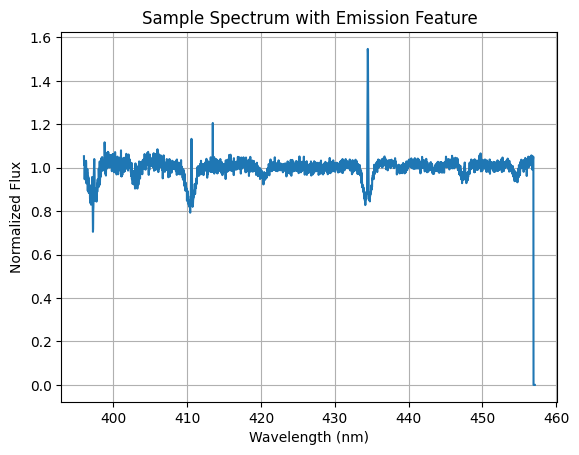

In [2]:
data_path = os.path.join('..', 'sample_data', 'sample_data_with_emission.csv')
data = np.loadtxt(data_path, delimiter=',')

wavelength = data[:, 0]
flux = data[:, 1]

plt.plot(wavelength, flux)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Flux')
plt.title('Sample Spectrum with Emission Feature')
plt.grid(True)
plt.show()

Firstly, fit a Voigt-only model to a spectral line (here H delta of an early B-type star)that shows emission

Fit Results (Voigt, Demo): Offset=1.031, Amplitude=0.166, Center=410.388 Å, Sigma=0.725 Å, gamma=0.050 Å
Estimated Radial Velocity: 158.98 km/s ± 1449.41 km/s 


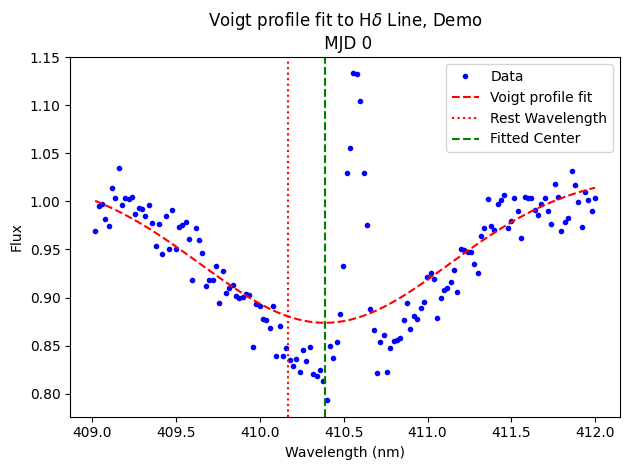


Estimated RV (Voigt-only): 158.98 ± 1449.41 km/s


In [3]:
# Fit the Voigt-only model
result_voigt = fit_voigt_model(wavelength_grid=wavelength, min_wl=409, max_wl=412, flux=flux, rest_wl=410.17, target_name='Demo', mjd_obs=0, plot=True)

rv_voigt, err_voigt = result_voigt[0], result_voigt[1]
print(f"\nEstimated RV (Voigt-only): {rv_voigt:.2f} ± {err_voigt:.2f} km/s")

As we can see, the Voigt fit alone doesn't quite capture the complete shape of this spectral line since the fit gets shifted upward due to the narrow emission feature in the middle of the line. This is also evident by the really high uncertainty even though the signal has a high S/N ratio

Therefore, we also include an additional Gaussian to the model to account for the emission feature in the center of the spectral line.

Fit Results (Voigt+Gaussian, Demo):
    Offset=1.019, Amp_v=0.378, cen_v=410.459 nm,
    sigma_v=0.360 nm, gamma_v=0.296 nm,
    amp_g=0.050, cen_g=410.569 nm, sigma_g=0.059 nm
Estimated Radial Velocity: 211.38 km/s ± 7.48 km/s 


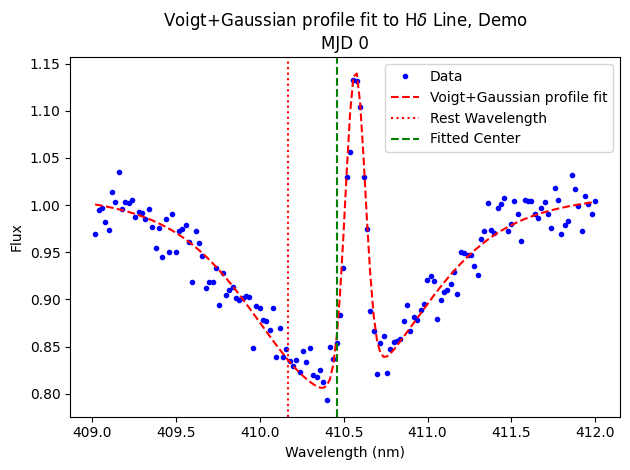


Estimated RV (Voigt + Gaussian): 211.38 ± 7.48 km/s


In [5]:
# Fit the Voigt + Gaussian model
result_vg = fit_voigt_plus_gaussian_model(wavelength_grid=wavelength, min_wl=409, max_wl=412, flux=flux, rest_wl=410.17, target_name='Demo', mjd_obs=0, plot=True)

rv_vg, err_vg = result_vg[0], result_vg[1]
print(f"\nEstimated RV (Voigt + Gaussian): {rv_vg:.2f} ± {err_vg:.2f} km/s")

The inclusion of an additive Gaussian to the Voigt profile not captures not only the broad absorption with the Voigt profile well but also the narrow Gaussian emission spike. Remarkably, the RV uncertainty has decreased by more than two orders of magnitude!

Let's compare the results of both fits again

In [9]:
print(f"RV (Voigt-only): {rv_voigt:.2f} ± {err_voigt:.2f} km/s")
print(f"RV (Voigt+Gaussian): {rv_vg:.2f} ± {err_vg:.2f} km/s")

RV (Voigt-only): 158.98 ± 1449.41 km/s
RV (Voigt+Gaussian): 211.38 ± 7.48 km/s


And finally plotting the results of the fits overlaid with the data

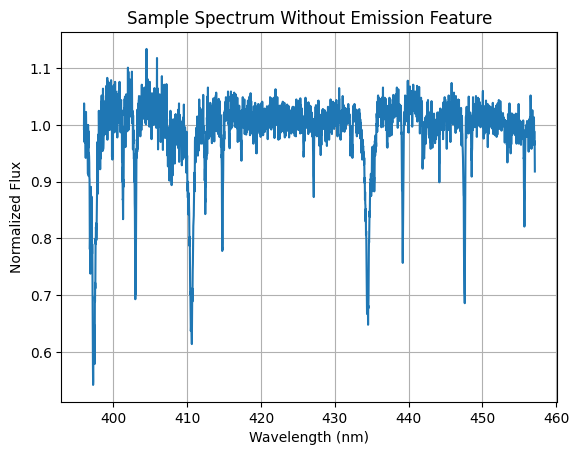

Fit Results (Voigt, NoEmission): Offset=0.997, Amplitude=1.000, Center=410.545 Å, Sigma=0.115 Å, gamma=0.206 Å
Estimated Radial Velocity: 273.99 km/s ± 253.29 km/s 


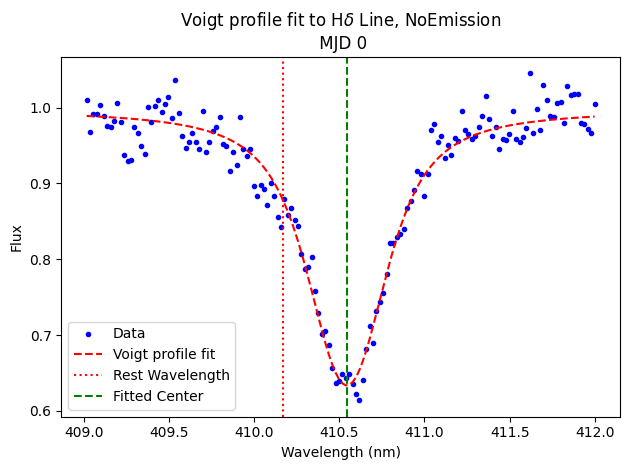

RV Estimate: 273.99 ± 253.29 km/s


In [10]:
data_no_emission = np.loadtxt(os.path.join('..', 'sample_data', 'sample_data_without_emission.csv'), delimiter=',')
wavelength2 = data_no_emission[:, 0]
flux2 = data_no_emission[:, 1]

plt.plot(wavelength2, flux2)
plt.title("Sample Spectrum Without Emission Feature")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Flux")
plt.grid(True)
plt.show()

result2 = fit_voigt_model(wavelength_grid = wavelength2, min_wl=409, max_wl=412, flux = flux2, rest_wl=410.17, target_name='NoEmission', mjd_obs=0, plot=True)
print(f"RV Estimate: {result2[0]:.2f} ± {result2[1]:.2f} km/s")

You can also test if the inclusion of the Gaussian component in this case alos significantly improves the fit

## 🎉 You're Done!

You’ve now fit Voigt and Voigt+Gaussian models to sample spectral lines and estimated radial velocities with uncertainties.

For more, see the [voigtfit GitHub repository](https://github.com/hwillems2/voigtfit).
